 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

You will require the following libraries: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets 

 Load the csv:  

In [ ]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)


We use the method <code>head</code> to display the first 5 columns of the dataframe.

In [ ]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Question 1 
Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image. 

In [ ]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Module 2: Data Wrangling

### Question 2 
Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>

In [ ]:
#@title
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())



We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>

In [ ]:
#@title
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>

In [ ]:
#@title
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
#@title
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

In [ ]:
df.drop(labels=['Unnamed: 0','id','date'],axis=1,inplace=True);

In [ ]:
column_labels=df.columns
column_labels

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# To check nan values in in each column
for x in column_labels:
  print(x," : ",df[x].isnull().sum())


price  :  0
bedrooms  :  13
bathrooms  :  10
sqft_living  :  0
sqft_lot  :  0
floors  :  0
waterfront  :  0
view  :  0
condition  :  0
grade  :  0
sqft_above  :  0
sqft_basement  :  0
yr_built  :  0
yr_renovated  :  0
zipcode  :  0
lat  :  0
long  :  0
sqft_living15  :  0
sqft_lot15  :  0


In [ ]:
#  processing NAN values

df['bathrooms'].fillna(df.bathrooms.mean(),inplace=True)
df['bedrooms'].fillna(df.bedrooms.mean(),inplace=True)

In [ ]:
# To check nan values in in each column
for x in column_labels:
  print(x," : ",df[x].isnull().sum())


price  :  0
bedrooms  :  0
bathrooms  :  0
sqft_living  :  0
sqft_lot  :  0
floors  :  0
waterfront  :  0
view  :  0
condition  :  0
grade  :  0
sqft_above  :  0
sqft_basement  :  0
yr_built  :  0
yr_renovated  :  0
zipcode  :  0
lat  :  0
long  :  0
sqft_living15  :  0
sqft_lot15  :  0


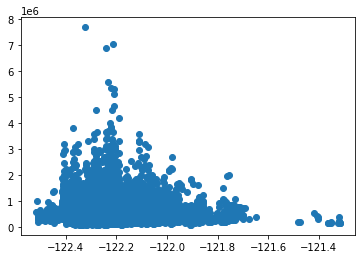

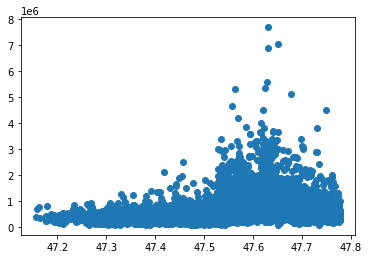

713230.8331237856
447558.055438226


In [ ]:
x=df['long']
y=df['price']
plt.scatter(x,y)
plt.show()

x=df['lat']
y=df['price']
plt.scatter(x,y)
plt.show()

# Classifying areas which are posh i.e. lie in region of high average price
def PoshLat(m):
  if(m>=47.543 and m<=47.72): return 1
  else: return 0


def PoshLong(m):
  if(m>=-122.44 and m<=-122.05) :return 1
  else: return 0

df["PoshAreaLat"]=df['lat'].apply(PoshLat)
df["PoshAreaLong"]=df['long'].apply(PoshLong)
print(df[(df['PoshAreaLong']==1) & (df['PoshAreaLat']==1)]['price'].mean())
print(df[(df['PoshAreaLong']==0) & (df['PoshAreaLat']==0)]['price'].mean())

In [ ]:
df.drop(labels=['zipcode'],axis=1,inplace=True);


In [ ]:
df.drop(labels=['lat','long'],axis=1,inplace=True);

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,PoshAreaLat,PoshAreaLong
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,1
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,0,1
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,1
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,1
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,1,1
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0,1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,1,1
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,0,1


In [ ]:
# Giving age to properties using year builts.
def giveAge(year):
  return 2015-year
df["PropertyAge"]=df['yr_built'].apply(giveAge)
df.drop(labels=['yr_built'],axis=1,inplace=True);
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,PoshAreaLat,PoshAreaLong,PropertyAge
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,0,1,60
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,0,1,64
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,0,1,82
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,0,1,50
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,1,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,1530,1509,1,1,6
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,1830,7200,0,1,1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,1020,2007,1,1,6
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,1410,1287,0,1,11


In [ ]:
# Normalizing Areas of different areas

df['sqft_living']=(df['sqft_living']-df['sqft_living'].mean())/(df['sqft_living'].std())
df['sqft_lot']=(df['sqft_lot']-df['sqft_lot'].mean())/(df['sqft_lot'].std())
df['sqft_above']=(df['sqft_above']-df['sqft_above'].mean())/(df['sqft_above'].std())
df['sqft_basement']=(df['sqft_basement']-df['sqft_basement'].mean())/(df['sqft_basement'].std())
df['sqft_living15']=(df['sqft_living15']-df['sqft_living15'].mean())/(df['sqft_living15'].std())
df['sqft_lot15']=(df['sqft_lot15']-df['sqft_lot15'].mean())/(df['sqft_lot15'].std())
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,PoshAreaLat,PoshAreaLong,PropertyAge
0,221900.0,3.0,1.00,-0.979812,-0.228316,1.0,0,0,3,7,-0.734691,-0.658666,0,-0.943333,-0.260709,0,1,60
1,538000.0,3.0,2.25,0.533622,-0.189881,2.0,0,0,3,7,0.460830,0.245136,1991,-0.432676,-0.187863,0,1,64
2,180000.0,2.0,1.00,-1.426221,-0.123296,1.0,0,0,3,6,-1.229805,-0.658666,0,1.070115,-0.172371,0,1,82
3,604000.0,4.0,3.00,-0.130547,-0.244009,1.0,0,0,5,7,-0.891678,1.397483,0,-0.914153,-0.284515,0,1,50
4,510000.0,3.0,2.00,-0.435412,-0.169649,1.0,0,0,3,8,-0.130892,-0.658666,0,-0.272184,-0.192844,1,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,-0.598732,-0.337417,3.0,0,0,3,8,-0.312032,-0.658666,0,-0.666119,-0.412371,1,1,6
21609,400000.0,4.0,2.50,0.250534,-0.224381,2.0,0,0,3,8,0.629894,-0.658666,0,-0.228413,-0.203942,0,1,1
21610,402101.0,2.0,0.75,-1.154021,-0.332129,2.0,0,0,3,7,-0.927906,-0.658666,0,-1.410220,-0.394132,1,1,6
21611,400000.0,3.0,2.50,-0.522516,-0.307069,2.0,0,0,3,8,-0.227500,-0.658666,0,-0.841202,-0.420502,0,1,11


In [ ]:
df['PropertyAge']=(df['PropertyAge']-df['PropertyAge'].min())/(df['PropertyAge'].max()-df['PropertyAge'].min())


In [ ]:
# Classifying whether Renovated in the past or not

def renovated(m):
  if(m>0): return 1
  else: return 0
df["yr_renovated"]=df['yr_renovated'].apply(renovated)




In [ ]:
df['grade']=(df['grade']-df['grade'].min())/(df['grade'].max()-df['grade'].min())


In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,PoshAreaLat,PoshAreaLong,PropertyAge
0,221900.0,3.0,1.00,-0.979812,-0.228316,1.0,0,0,3,0.500000,-0.734691,-0.658666,0,-0.943333,-0.260709,0,1,0.521739
1,538000.0,3.0,2.25,0.533622,-0.189881,2.0,0,0,3,0.500000,0.460830,0.245136,1,-0.432676,-0.187863,0,1,0.556522
2,180000.0,2.0,1.00,-1.426221,-0.123296,1.0,0,0,3,0.416667,-1.229805,-0.658666,0,1.070115,-0.172371,0,1,0.713043
3,604000.0,4.0,3.00,-0.130547,-0.244009,1.0,0,0,5,0.500000,-0.891678,1.397483,0,-0.914153,-0.284515,0,1,0.434783
4,510000.0,3.0,2.00,-0.435412,-0.169649,1.0,0,0,3,0.583333,-0.130892,-0.658666,0,-0.272184,-0.192844,1,0,0.243478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,-0.598732,-0.337417,3.0,0,0,3,0.583333,-0.312032,-0.658666,0,-0.666119,-0.412371,1,1,0.052174
21609,400000.0,4.0,2.50,0.250534,-0.224381,2.0,0,0,3,0.583333,0.629894,-0.658666,0,-0.228413,-0.203942,0,1,0.008696
21610,402101.0,2.0,0.75,-1.154021,-0.332129,2.0,0,0,3,0.500000,-0.927906,-0.658666,0,-1.410220,-0.394132,1,1,0.052174
21611,400000.0,3.0,2.50,-0.522516,-0.307069,2.0,0,0,3,0.583333,-0.227500,-0.658666,0,-0.841202,-0.420502,0,1,0.095652


# Module 3: Exploratory Data Analysis

### Question 3
Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [ ]:
d=df['floors'].to_frame()
d.groupby(by='floors')
d.value_counts().to_frame()

,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4
Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

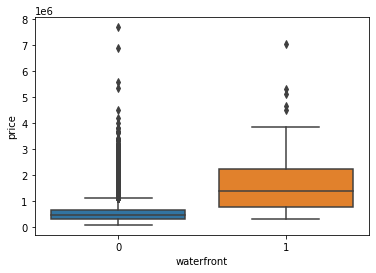

In [ ]:
sns.boxplot(x='waterfront', y='price',data=df)              

**Clearly houses without a waterfront view have more price outliers.**

### Question 5
Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

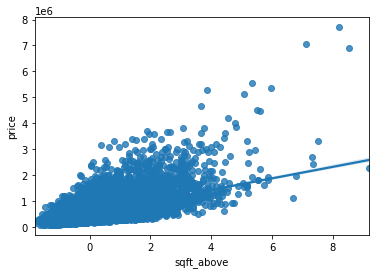

In [ ]:
  sns.regplot(x='sqft_above',y='price',data=df)

In [ ]:
df[['sqft_above','price']].corr(method='pearson')

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


**The feature sqft_above is positively correlated with price as it is .**


We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.

In [ ]:
df.corr()['price'].sort_values()

PropertyAge     -0.054012
PoshAreaLong     0.011662
condition        0.036362
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126092
floors           0.256794
waterfront       0.266369
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
PoshAreaLat      0.418387
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.

In [ ]:
# X = df[['long']]
# Y = df['price']
# lm = LinearRegression()
# lm.fit(X,Y)
# lm.score(X, Y)

### Question  6
Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [ ]:
X = df[['sqft_living']]
Y = df['price']
lm_sqft_living= LinearRegression()
lm_sqft_living.fit(X,Y)
lm_sqft_living.score(X, Y)

0.49285321790379316

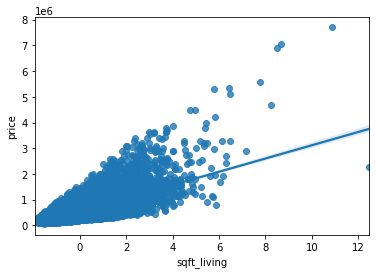

In [ ]:
sns.regplot(x='sqft_living',y='price', data=df)


### Question 7
Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [ ]:
# features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'PoshAreaLat', 'PoshAreaLong', 'PropertyAge'],
      dtype='object')

**I have used my customised features not the given above.**

In [ ]:
myfeatures =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'PoshAreaLat', 'PoshAreaLong', 'PropertyAge']     

In [ ]:
X = df[myfeatures]
Y = df['price']
lm= LinearRegression()
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**The calculated value of R^2 is :**

In [ ]:
lm.score(X, Y)

0.7183750179013325

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor 

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [ ]:
pipe=Pipeline(Input)

In [ ]:
pipe.fit(df[myfeatures],df['price'])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
pipe.score(df[myfeatures],df['price'])

0.8215467140192998

# Module 5: Model Evaluation and Refinement

Import the necessary modules:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [ ]:
# features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
# X = df[features]
# Y = df['price']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


# print("number of test samples:", x_test.shape[0])
# print("number of training samples:",x_train.shape[0]

# Again I have used my features here.

# myfeatures =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
#        'PoshAreaLat', 'PoshAreaLong', 'PropertyAge']

X = df[myfeatures]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])





number of test samples: 3242
number of training samples: 18371


### Question 9
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)



Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
RidgeModel.score(x_test,y_test)

0.7113612246428643

### Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [ ]:
pr=PolynomialFeatures(degree=2, include_bias=False)
x_train_transformed=pr.fit_transform(x_train)
x_test_transformed=pr.fit_transform(x_test)

In [ ]:
x_train_transformed.shape


(18371, 170)

In [ ]:
RidgeModel_2=Ridge(alpha=0.1)
RidgeModel_2.fit(x_train_transformed,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
RidgeModel_2.score(x_test_transformed, y_test)

0.8124205950350916

<p>Once you complete your notebook you will have to share it. Select the icon on the top right a marked in red in the image below, a dialogue box should open, and select the option all&nbsp;content excluding sensitive code cells.</p>
        <p><img width="600" src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/save_notebook.png" alt="share notebook"  style="display: block; margin-left: auto; margin-right: auto;"/></p>
        <p></p>
        <p>You can then share the notebook&nbsp; via a&nbsp; URL by scrolling down as shown in the following image:</p>
        <p style="text-align: center;"><img width="600"  src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/url_notebook.png" alt="HTML" style="display: block; margin-left: auto; margin-right: auto;" /></p>
        <p>&nbsp;</p>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 